# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

- Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Гипотезы для исследования
1. Недвижимость в центре Санкт-Петербурга стоит дороже, чем вдали от исторического центра
2. Существует зависимость между следующими парметрами данных: 
- стоимость недвижимости -- от площади, числа комнат, удалённости от центра. 
- стоимость недвижимости --  от этажа расположения квартиры (первый, последний, другой).
- стоимость недвижимости -- дата размещения обьявления (дня недели, месяца и года)

## Импорт библиотек_ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import date
from IPython.display import display
pd.set_option('precision', 2)
import seaborn as sns
import numpy as np
pd.set_option('mode.chained_assignment', None)
from IPython.display import display
pd.set_option('precision', 2)

In [2]:
data = pd.read_csv('/Users/l.stefanenko/Desktop/Yandex/Github/№3 Цена на недвижимоть/real_estate_data (2).csv', sep = '\t')

In [3]:
data.shape

(23699, 22)

В таблице 22 столбца и 23699 строчки.Проверим название колонок на соотвествие принципу snake_case

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Видим одно название столбца, не соответсвующее змениному регистру, переименуем его

In [5]:
data.rename(columns = {'cityCenters_nearest':'center_nearest'},inplace = True)

In [6]:
def info(df: pd.DataFrame):
    print(f'Информация:')
    print(f'Первые {len(df.head())} строк:')
    display(df.head())
    print('Общая информация:')
    df.info()
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print(f'Количество пропущенных значений:{df.isna().sum()}')

In [7]:
info(data)

Информация:
Первые 5 строк:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,1.30e+07,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.35e+06,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.20e+06,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,6.49e+07,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,1.00e+07,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  a

### Вывод: 
- В датасете много пропусков, обработаем каждую категорию отдельно
- в таблице DataFrame используются булев тип данных, численный, float и object. В блоке предобработки
данных заменим тип некоторых данных для минимизации обьема затрачиваемой для работы памяти и для подготовки данных для исследования



## Предобработка данных

In [8]:
def data_describe (data:pd.DataFrame, colname: str):
    print (f"Количество пропусков:{sum(data[colname].isna())}")
    print (f"Тип переменной {data.dtypes[colname]}")
    print (f"Количество уникальных значений {data[colname].value_counts()}")

In [9]:
def hist (x:pd.Series):
    plt.figure()
    plt.hist(x,edgecolor = 'black',color  = 'skyblue') #добавление черной границы столбца
    plt.grid()

## Изменение типов данных_дата

In [10]:
def change_type (data:pd.DataFrame, colname: str):
    data[colname] = data[colname].round(0)
    data[colname] = data[colname].astype('Int64')

In [11]:
lst = ['days_exposition',
       'ponds_nearest',
       'ponds_around3000',
       'parks_nearest',
       'parks_around3000',
       'last_price', 
       'center_nearest', 
       'balcony',
       'airports_nearest']
for elem in lst:
    change_type(data,elem)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  Int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  Int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S')

In [14]:
#выделим отдельные столбцы с неделей,месяцем и годом публикации для дальшенейшего анализа
data['weekday']= data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year 

## Работа с пропусками

### balcony, is_apartment

In [15]:
#Заменяем NaN у балконов на 0, т.к. скорее всего балконов в квартире нет, поэтому данные и не указали.
data['balcony'] = data['balcony'].fillna(value = 0)

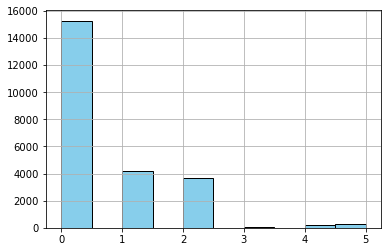

In [16]:
hist(data['balcony'])

/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony'>

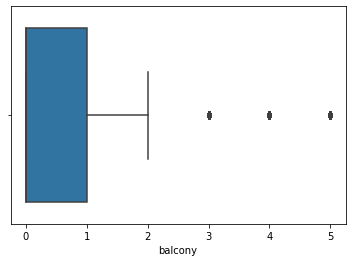

In [17]:
sns.boxplot(data['balcony'])

In [18]:
#На графике с усами видны аномальные значения, ограничим количество балконов до 3 в датасете
data = data[data['balcony']<=3]

In [19]:
#Проведем кодирование признаков в столбце  указание аппартаментов. 1- True, 0 = False, все пропуки заполнятся нулями
data['is_apartment'] = pd.get_dummies (data['is_apartment'],drop_first = True)

In [20]:
data['is_apartment'].value_counts()

0    23167
1       45
Name: is_apartment, dtype: int64

### Высота потолков ceiling_height

Высота потолков зависит от этажности.В центре старый жилой фонд низкой этажности и с высокими потолками. Современные дома,как правило, уже имеют стандартную высоту потолков -- 2.7м. Заполним пропуски согласно данной гипотезе

In [21]:
data.loc[(data.center_nearest <= 30) & (data.ceiling_height.isna()), 'ceiling_height'] = 3.5
data.loc[(data.center_nearest > 30) & (data.ceiling_height.isna()), 'ceiling_height'] = 2.7
data.loc[(data.floors_total >= 10) & (data.ceiling_height.isna()), 'ceiling_height'] = 2.7
data.loc[(data.floors_total <= 5) & (data.ceiling_height.isna()), 'ceiling_height'] = 3.5

In [22]:
data['ceiling_height'].isna().sum()

322

In [23]:
data[data.ceiling_height.isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year
30,12,2200000,32.8,2018-02-19,1,NaN,9.0,NaN,2,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,63,0,2,2018
257,16,3450000,58.0,2016-03-14,3,NaN,9.0,38.5,1,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,473,0,3,2016
526,9,4350000,55.0,2017-05-30,2,NaN,9.0,30.0,9,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,1,5,2017
592,5,3100000,46.0,2015-07-30,2,NaN,7.0,30.0,6,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,688,3,7,2015
703,5,1200000,57.4,2016-07-07,3,NaN,9.0,NaN,3,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,786,3,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,10,1450000,29.0,2017-11-11,0,NaN,9.0,18.0,8,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82,5,11,2017
23607,20,3700000,63.0,2017-12-11,2,NaN,6.0,NaN,3,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,43,0,12,2017
23623,19,4500000,68.9,2017-12-26,1,NaN,6.0,42.8,5,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,27,1,12,2017
23651,7,3350000,41.0,2018-12-17,1,NaN,6.0,18.0,1,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,12,2018


/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ceiling_height'>

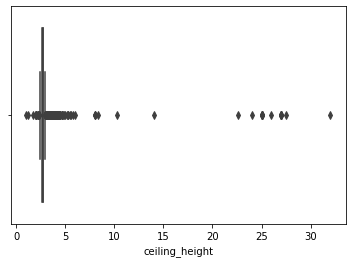

In [24]:
sns.boxplot(data['ceiling_height'])

In [25]:
#Видим аномальные значения высоты потолков, ограничим максимальную высоту потолков от 2.5 до 5 метров
data = data[data['ceiling_height']<=5]
data = data[data['ceiling_height']>2.5]

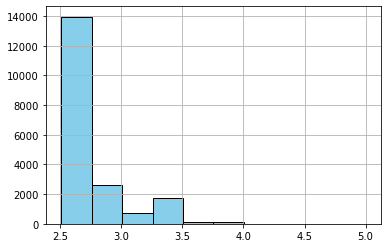

In [26]:
hist(data['ceiling_height'])

### days_exposition

In [27]:
#заменим пропуски в days_exposition на 1, предполагая, что  эти обьявления появились недавно
data['days_exposition']= data.loc[:,'days_exposition'].fillna(1)

In [28]:
data.shape

(19320, 25)

In [29]:
for col  in data.columns:
    print ('Количество пропусков в колонке %s=%d'% (col,data[col].isna().sum()))

Количество пропусков в колонке total_images=0
Количество пропусков в колонке last_price=0
Количество пропусков в колонке total_area=0
Количество пропусков в колонке first_day_exposition=0
Количество пропусков в колонке rooms=0
Количество пропусков в колонке ceiling_height=0
Количество пропусков в колонке floors_total=77
Количество пропусков в колонке living_area=1600
Количество пропусков в колонке floor=0
Количество пропусков в колонке is_apartment=0
Количество пропусков в колонке studio=0
Количество пропусков в колонке open_plan=0
Количество пропусков в колонке kitchen_area=1974
Количество пропусков в колонке balcony=0
Количество пропусков в колонке locality_name=45
Количество пропусков в колонке airports_nearest=4120
Количество пропусков в колонке center_nearest=4098
Количество пропусков в колонке parks_around3000=4097
Количество пропусков в колонке parks_nearest=12510
Количество пропусков в колонке ponds_around3000=4097
Количество пропусков в колонке ponds_nearest=11431
Количество п

## Аномальные значения

### living_area и total_area kitchen_area

count    19320.00
mean        62.05
std         37.56
min         12.00
25%         40.00
50%         53.00
75%         72.00
max        900.00
Name: total_area, dtype: float64


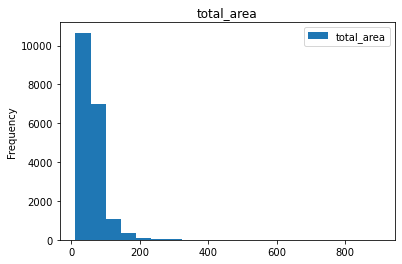

count    17720.00
mean        35.10
std         23.36
min          2.00
25%         18.50
50%         30.20
75%         43.00
max        409.70
Name: living_area, dtype: float64


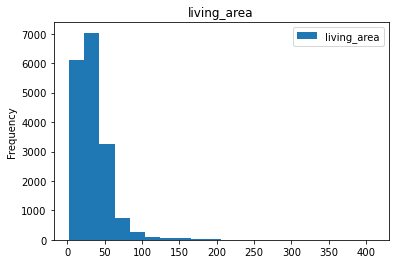

count    17346.00
mean        11.09
std          6.09
min          1.30
25%          8.00
50%         10.00
75%         12.24
max        112.00
Name: kitchen_area, dtype: float64


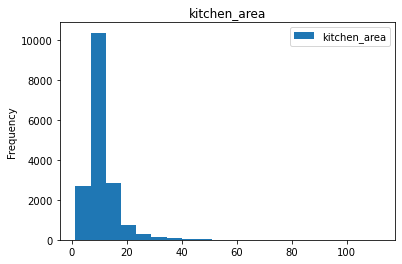

In [30]:
columns_first = ['total_area', 'living_area', 'kitchen_area']
for row in columns_first:
    print(data[row].describe())
    data[columns_first].plot(y=row, title=row, kind='hist', bins = 20, range=(min(data[row]), max(data[row])))
    plt.show()

/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


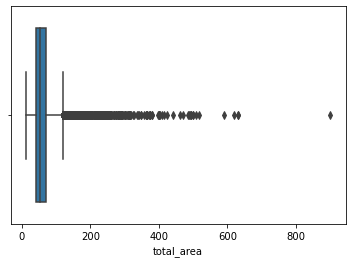

In [31]:
sns.boxplot(data['total_area']);

In [32]:
data['total_area'].describe()

count    19320.00
mean        62.05
std         37.56
min         12.00
25%         40.00
50%         53.00
75%         72.00
max        900.00
Name: total_area, dtype: float64

In [33]:
#уберем аномальные значения столбца total_area
data = data.query('total_area>=20 and total_area<200')

/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    17149.00
mean         0.19
std          0.07
min          0.03
25%          0.14
50%          0.18
75%          0.24
max          0.79
Name: square_k, dtype: float64

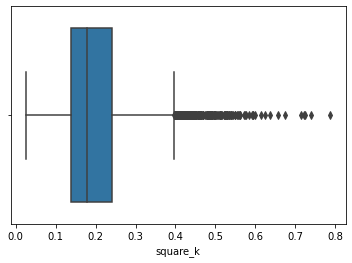

In [34]:
#найдем отношение площади кухни к общей площади, потроим боксплот
data['square_k'] = data['kitchen_area']/data['total_area']
sns.boxplot(data['square_k'])
data['square_k'].describe()

In [35]:
#уберем аномальные значения, руководствуюясь показателем отношения площадей кухни
data = data[data['square_k']<=0.4]
data.shape

(16887, 26)

/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    16545.00
mean         0.56
std          0.10
min          0.02
25%          0.48
50%          0.56
75%          0.63
max          0.98
Name: square_l, dtype: float64

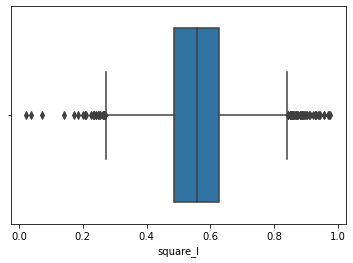

In [36]:
data['square_l'] = data['living_area']/data['total_area']
sns.boxplot(data['square_l'])
data['square_l'].describe()

In [37]:
data = data.query('square_l<=0.82 and square_l>=0.25')
data.shape

(16459, 27)

[Text(1, 0, 'total_area'),
 Text(2, 0, 'living_area'),
 Text(3, 0, 'kitchen_area')]

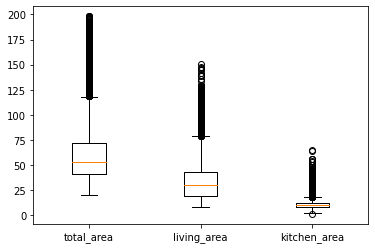

In [38]:
my_dict = {'total_area' : data['total_area'],'living_area':data['living_area'],'kitchen_area': data['kitchen_area']}

fig,ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

count    16459.00
mean        60.04
std         27.09
min         20.00
25%         40.70
50%         53.50
75%         71.80
max        198.10
Name: total_area, dtype: float64


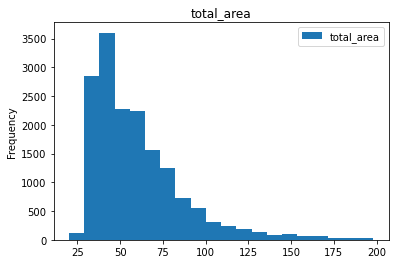

count    16459.00
mean        34.07
std         18.00
min          8.30
25%         18.80
50%         30.50
75%         43.00
max        150.80
Name: living_area, dtype: float64


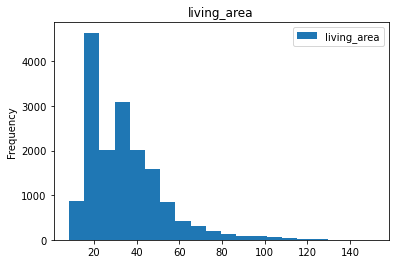

count    16459.00
mean        10.58
std          4.82
min          1.30
25%          7.80
50%          9.90
75%         12.00
max         65.00
Name: kitchen_area, dtype: float64


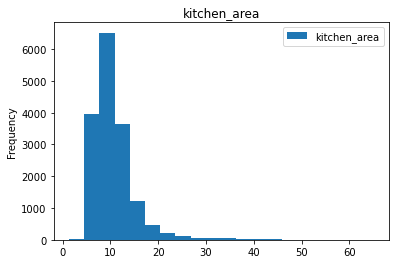

In [39]:
#Помотрим на итоговое распеределение после  очистки от выборосов
columns_first = ['total_area', 'living_area', 'kitchen_area']
for row in columns_first:
    print(data[row].describe())
    data[columns_first].plot(y=row, title=row, kind='hist', bins = 20, range=(min(data[row]), max(data[row])))
    plt.show()

In [40]:
data[data['kitchen_area']==1.30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,square_k,square_l
20217,7,4250000,28.5,2019-05-01,1,2.8,14.0,19.5,10,0,...,0,<NA>,0,<NA>,1,2,5,2019,0.05,0.68


### rooms

In [41]:
def desribe(data:pd.DataFrame, colname: str):
        print(data[colname].describe())
        data[colname].plot(y=colname, title=colname, kind='hist', bins = 20, range=(min(data[colname]), max(data[colname])))
        plt.show()
        sns.boxplot(data[colname])

count    16459.00
mean         2.06
std          1.00
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64


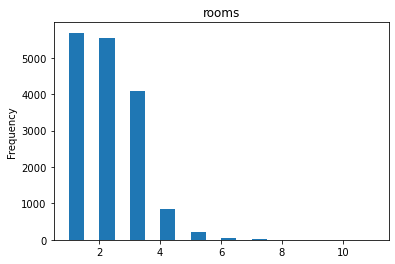

/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


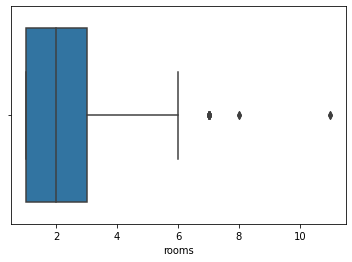

In [42]:
desribe(data,'rooms')

In [43]:
data= data.query('rooms<=6')

## last_price 

In [44]:
data['price_m'] = data['last_price']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,square_k,square_l,price_m
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,0,...,482,2,755,1,3,3,2019,0.23,0.47,120370.37
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,0,...,<NA>,0,<NA>,81,1,12,2018,0.27,0.46,82920.79
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.3,4,0,...,90,2,574,558,3,8,2015,0.15,0.61,92785.71
5,10,2890000,30.4,2018-09-10,1,2.7,12.0,14.4,5,0,...,<NA>,<NA>,<NA>,55,0,9,2018,0.30,0.47,95065.79
6,6,3700000,37.3,2017-11-02,1,2.7,26.0,10.6,6,0,...,<NA>,0,<NA>,155,3,11,2017,0.39,0.28,99195.71


count    1.64e+04
mean     1.00e+05
std      4.54e+04
min      1.12e+02
25%      7.88e+04
50%      9.64e+04
75%      1.15e+05
max      1.74e+06
Name: price_m, dtype: float64


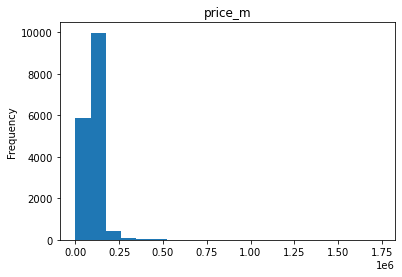

/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


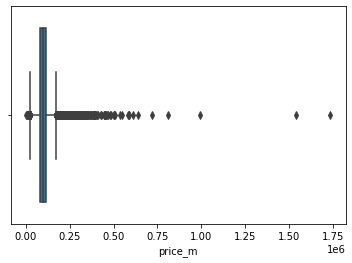

In [45]:
desribe(data,'price_m')

In [46]:
data = data.loc[(data.price_m > 20000) & (data.price_m < 250000)]
data.shape

(16175, 28)

In [47]:
for col  in data.columns:
    print ('Количество пропусков в колонке %s=%d'% (col,data[col].isna().sum()))

Количество пропусков в колонке total_images=0
Количество пропусков в колонке last_price=0
Количество пропусков в колонке total_area=0
Количество пропусков в колонке first_day_exposition=0
Количество пропусков в колонке rooms=0
Количество пропусков в колонке ceiling_height=0
Количество пропусков в колонке floors_total=36
Количество пропусков в колонке living_area=0
Количество пропусков в колонке floor=0
Количество пропусков в колонке is_apartment=0
Количество пропусков в колонке studio=0
Количество пропусков в колонке open_plan=0
Количество пропусков в колонке kitchen_area=0
Количество пропусков в колонке balcony=0
Количество пропусков в колонке locality_name=36
Количество пропусков в колонке airports_nearest=3265
Количество пропусков в колонке center_nearest=3248
Количество пропусков в колонке parks_around3000=3247
Количество пропусков в колонке parks_nearest=10494
Количество пропусков в колонке ponds_around3000=3247
Количество пропусков в колонке ponds_nearest=9647
Количество пропуско

Пропуки в floors_total, удаленности до центра  и тп оставим незаполенными.

## Исследование данных

В исследовании не могут участвовать обьявления без изображений, они не пройдут модерацию на платформе, поэтому удалим их

In [48]:
data = data.query('total_images != 0')
data.shape

(15528, 28)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

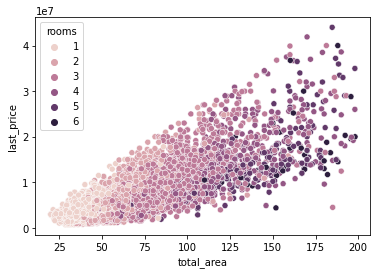

In [49]:
sns.scatterplot (data=data, x ='total_area',y = 'last_price',hue = 'rooms')

<AxesSubplot:xlabel='total_area', ylabel='price_m'>

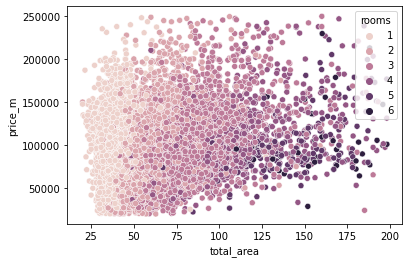

In [50]:
sns.scatterplot (data=data, x ='total_area',y = 'price_m',hue = 'rooms')

Вывод: на стоимоть квартир влият количетво комнат и площадь. Наблюдается линейная зависимоть между площадью и стоимостью. Также на графике мы видим недорогую 6 комнатную квартиру и большое количество двухкомнатных по высокой стоимотси. 
Наиболее низкая стоимость квадратного метра наблюдается у много комнатных квартир. от 4 

count    15528.00
mean        59.53
std         26.26
min         20.00
25%         40.50
50%         53.06
75%         71.12
max        198.10
Name: total_area, dtype: float64
count    1.55e+04
mean     6.03e+06
std      4.07e+06
min      6.30e+05
25%      3.62e+06
50%      4.90e+06
75%      7.00e+06
max      4.40e+07
Name: last_price, dtype: float64
count    15528.00
mean         2.05
std          0.98
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64
count    15528.00
mean         2.80
std          0.27
min          2.51
25%          2.70
50%          2.70
75%          2.80
max          4.70
Name: ceiling_height, dtype: float64
count    15528.00
mean       163.91
std        217.08
min          1.00
25%         24.00
50%         83.00
75%        212.00
max       1553.00
Name: days_exposition, dtype: float64


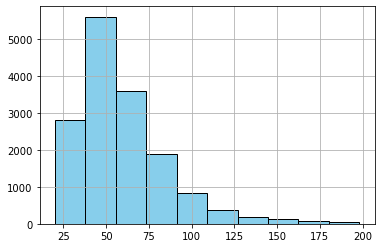

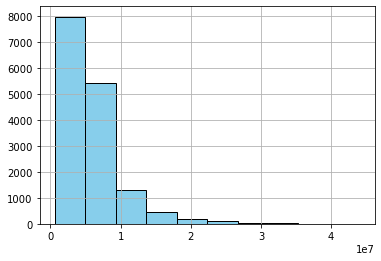

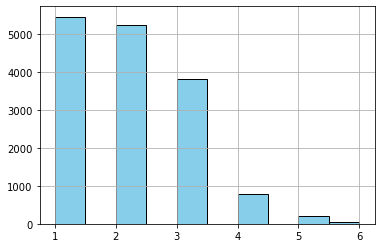

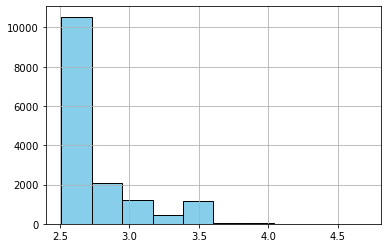

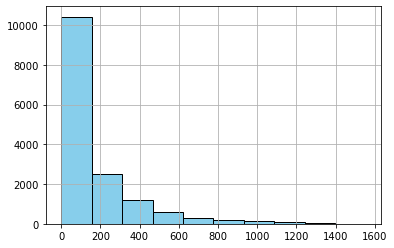

In [51]:
columns_first = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for row in columns_first:
    print(data[row].describe())
    hist(data[row])
    

#### Анализ десяти населённых пунктов с наибольшим числом объявлений
"Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [52]:
data_pivot_price_m = data.pivot_table(
    index = 'locality_name',
    values = 'price_m', 
    aggfunc = ['count', 'median', 'max', 'min']).sort_values (('max','price_m'), ascending = False)
display (data_pivot_price_m.head (11))

,count,median,max,min
,price_m,price_m,price_m,price_m
locality_name,,,,
Санкт-Петербург,10738,104823.2,249375.0,26250.0
Зеленогорск,16,101666.67,225000.0,53303.72
Пушкин,233,102083.33,204451.77,59836.07
Сестрорецк,128,101288.84,182688.17,50434.78
Павловск,28,85584.42,161428.57,53082.19
Кудрово,130,99723.84,160401.0,68518.52
Петергоф,138,82233.9,150000.0,51612.9
Гатчина,181,67924.53,146315.79,28205.13


#### Вывод о средней стоимости метра
Самое дорогое жилье находится в Петербурге по средней стоимости 249375 тыс за кв. метр, а самое дешевое в поселке Парголово, стоимость 138522 тыс за кв. метр

### Анализ стоимости квадратного метра квартиры в зависимости от количетва комнат

In [53]:
data_pivot_price_m = data.pivot_table(
    index = 'rooms',
    values = 'price_m', 
    aggfunc = ['count', 'median', 'max', 'min']).sort_values (('median','price_m'), ascending = False)

display (data_pivot_price_m.head (11))

,count,median,max,min
,price_m,price_m,price_m,price_m
rooms,,,,
1,5450,101058.23,247706.42,20277.78
2,5226,94890.84,249056.6,20063.69
4,794,94861.69,246470.59,26250.0
6,48,92550.67,229400.75,28919.63
5,196,91531.94,238224.15,22458.63
3,3814,91333.33,249375.0,20338.98


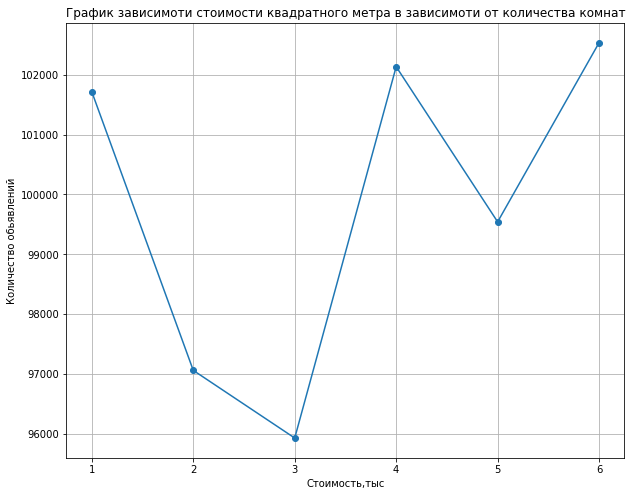

In [54]:
data.groupby('rooms')['price_m'].mean().plot(x='rooms',y='price_m',style='o-',
                                                                         grid=True,
                                                                         figsize=(10,8),ylabel = 'Количество обьявлений',
                                                   xlabel = 'Стоимость,тыс', 
                                                   title = 'График зависимоти стоимости квадратного метра в зависимоти от количества комнат');


### Вывод: Выше всего стоимость квадратного метра у однокомтных квартир. В среднм она равна 101058. Ниже вего стоимость у трехкомнтаных 91333

In [55]:
#Категоризация этажей: первый, поледний, другой
def floor(row):
        if row['floor'] == 1:
            return "first"
        if row['floor'] == row['floors_total']:
            return 'last'
        else:
            return 'other'
data['category_floor'] = data.apply(floor, axis = 1)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,square_k,square_l,price_m,category_floor
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,0,...,2,755,1,3,3,2019,0.23,0.47,120370.37,other
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,0,...,0,<NA>,81,1,12,2018,0.27,0.46,82920.79,first
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.3,4,0,...,2,574,558,3,8,2015,0.15,0.61,92785.71,other
5,10,2890000,30.4,2018-09-10,1,2.7,12.0,14.4,5,0,...,<NA>,<NA>,55,0,9,2018,0.30,0.47,95065.79,other
6,6,3700000,37.3,2017-11-02,1,2.7,26.0,10.6,6,0,...,0,<NA>,155,3,11,2017,0.39,0.28,99195.71,other


In [56]:
data_pivot_floor = data.pivot_table(
    index = 'category_floor',
    values = 'price_m', 
    aggfunc = ['count', 'median', 'max', 'min']).sort_values (('median','price_m'), ascending = False)

display(data_pivot_floor)

,count,median,max,min
,price_m,price_m,price_m,price_m
category_floor,,,,
other,11643,99667.77,249375.0,20238.1
last,2071,89534.88,241984.8,20140.11
first,1814,82935.05,244444.44,20063.69


<AxesSubplot:xlabel='price_m', ylabel='total_area'>

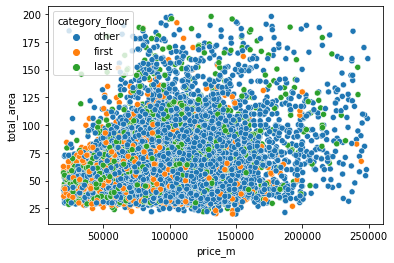

In [57]:
sns.scatterplot (data = data, x = 'price_m', y = 'total_area', hue = 'category_floor')

Вывод: наибольшая стоимость квадратного метра наблюдается у обьектов, которые находятся не на первом и не на поледниим этажах == 11643 средняя стоимость

### Стоимость квартиры в завимисимости от удаленности от центра

In [58]:
#Найдем квартиры, локация которых "Санкт-Петербург"
data_peter = data.query( "locality_name == 'Санкт-Петербург'" )
display (data_peter)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,square_k,square_l,price_m,category_floor
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,0,...,2,755,1,3,3,2019,0.23,0.47,120370.37,other
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.3,4,0,...,2,574,558,3,8,2015,0.15,0.61,92785.71,other
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.3,3,0,...,2,553,137,3,11,2017,0.21,0.51,127525.25,other
15,16,4650000,39.00,2017-11-18,1,2.70,14.0,20.5,5,0,...,1,296,19,5,11,2017,0.19,0.53,119230.77,other
16,11,6700000,82.00,2017-11-23,3,3.05,5.0,55.6,1,0,...,0,<NA>,397,3,11,2017,0.11,0.68,81707.32,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15.0,63.0,12,0,...,0,<NA>,23,0,4,2019,0.15,0.62,91089.11,other
23689,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.3,4,0,...,2,652,29,2,2,2018,0.26,0.46,100566.57,other
23690,3,5500000,52.00,2018-07-19,2,2.70,5.0,31.0,2,0,...,0,<NA>,15,3,7,2018,0.12,0.60,105769.23,other
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,0,...,1,806,519,3,10,2016,0.15,0.55,129903.98,other


In [59]:
data_peter['city_centre_km'] = (data_peter['center_nearest']/1000).round()
data_peter['price_city_centre_km'] = (data_peter['price_m']/data_peter['city_centre_km']).round()
display(data_peter.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,weekday,month,year,square_k,square_l,price_m,category_floor,city_centre_km,price_city_centre_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,1,3,3,2019,0.23,0.47,120370.37,other,16.0,7523.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,0,...,558,3,8,2015,0.15,0.61,92785.71,other,14.0,6628.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,0,...,137,3,11,2017,0.21,0.51,127525.25,other,14.0,9109.0
15,16,4650000,39.0,2017-11-18,1,2.70,14.0,20.5,5,0,...,19,5,11,2017,0.19,0.53,119230.77,other,14.0,8516.0
16,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.6,1,0,...,397,3,11,2017,0.11,0.68,81707.32,first,11.0,7428.0


In [60]:
data_peter['city_centre_km'].isna().sum()

29

In [61]:
data_peter[data_peter.city_centre_km.isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,weekday,month,year,square_k,square_l,price_m,category_floor,city_centre_km,price_city_centre_km
593,20,4200000,38.30,2019-04-16,1,2.60,16.0,19.80,10,0,...,1,1,4,2019,0.26,0.52,109660.57,other,<NA>,<NA>
604,11,9899000,101.00,2018-12-12,3,3.00,5.0,62.00,3,0,...,1,2,12,2018,0.15,0.61,98009.9,other,<NA>,<NA>
795,19,7100000,59.60,2019-02-13,2,3.40,5.0,36.60,2,0,...,1,2,2,2019,0.21,0.61,119127.52,other,<NA>,<NA>
1872,13,3100000,32.00,2019-03-15,1,3.50,4.0,19.00,2,0,...,3,4,3,2019,0.16,0.59,96875.0,other,<NA>,<NA>
1895,12,9500000,130.00,2019-03-27,5,3.50,5.0,90.00,2,0,...,15,2,3,2019,0.12,0.69,73076.92,other,<NA>,<NA>
2364,17,4300000,32.60,2019-04-28,1,2.70,25.0,14.30,17,0,...,1,6,4,2019,0.25,0.44,131901.84,other,<NA>,<NA>
2707,14,5650000,51.00,2019-02-26,2,3.20,9.0,31.00,5,0,...,1,1,2,2019,0.20,0.61,110784.31,other,<NA>,<NA>
3501,3,14000000,78.00,2019-04-22,4,3.00,7.0,51.00,7,0,...,1,0,4,2019,0.10,0.65,179487.18,last,<NA>,<NA>
4781,10,6800000,62.40,2019-04-19,2,2.95,5.0,41.50,1,0,...,1,4,4,2019,0.12,0.67,108974.36,first,<NA>,<NA>
5216,20,10900000,81.30,2019-03-28,2,2.73,16.0,28.00,5,0,...,1,3,3,2019,0.30,0.34,134071.34,other,<NA>,<NA>


In [62]:
data_peter['city_centre_km'] = data_peter['city_centre_km'].fillna(value = 1)

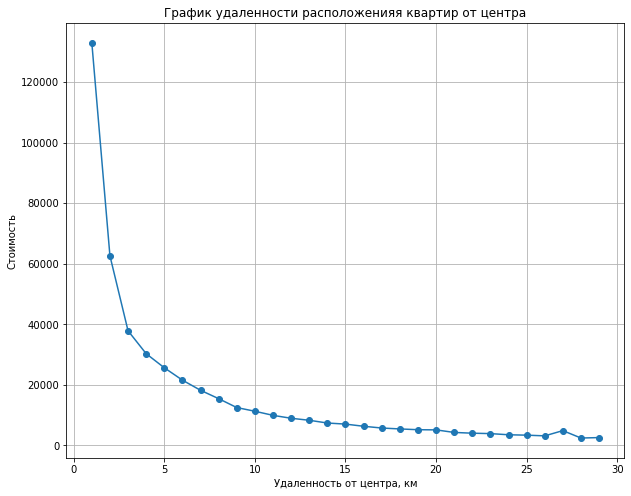

In [63]:
data_peter.groupby('city_centre_km')['price_city_centre_km'].mean().plot(x='city_centre_km',
                                                                        y='price_city_centre_km',
                                                                         style='o-',
                                                                         grid=True,
                                                                         figsize=(10,8),ylabel = 'Стоимость',xlabel = 'Удаленность от центра, км', title = 'График удаленности расположенияя квартир от центра');

#### Вывод_определение центра Санкт-Петербурга

На графике видно, что плато образуется после 10 км, следовательно ограничим центр Санкт-Петербурга 10 км, среднюю зону с 10 до 30 обозначми средней и все, что далее -- регионом. 

In [64]:
data.center_nearest.isna().sum()

3133

In [65]:
data['center_nearest']  =  data['center_nearest'].astype('float64')
data['price_m']  =  data['price_m'].astype('float64')

In [66]:
#заполним пропуски с помощью transform на основе высоты потолков. в центре они выше. 
data['center_nearest'] = data['center_nearest'].fillna(
    data.groupby('last_price')['center_nearest'].transform('median'))

In [67]:
def center_category (rr):
    if rr['center_nearest'] <= 10000:
        return 'central_area'
    if rr['center_nearest'] >10000 and rr['center_nearest'] < 30000:
        return 'middle_area'
    if rr['center_nearest'] >30000:
        return 'region'
data['center_category'] = data.apply(center_category, axis = 1)
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday,month,year,square_k,square_l,price_m,category_floor,center_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,0,...,755,1,3,3,2019,0.23,0.47,120370.37,other,middle_area
1,7,3350000,40.40,2018-12-04,1,2.70,11.0,18.6,1,0,...,<NA>,81,1,12,2018,0.27,0.46,82920.79,first,middle_area
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.3,4,0,...,574,558,3,8,2015,0.15,0.61,92785.71,other,middle_area
5,10,2890000,30.40,2018-09-10,1,2.70,12.0,14.4,5,0,...,<NA>,55,0,9,2018,0.30,0.47,95065.79,other,middle_area
6,6,3700000,37.30,2017-11-02,1,2.70,26.0,10.6,6,0,...,<NA>,155,3,11,2017,0.39,0.28,99195.71,other,middle_area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,0,...,806,519,3,10,2016,0.15,0.55,129903.98,other,central_area
23692,2,1350000,30.00,2017-07-07,1,3.50,5.0,17.5,4,0,...,<NA>,413,4,7,2017,0.20,0.58,45000.00,other,None
23693,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,0,...,675,239,4,8,2016,0.13,0.64,73717.95,other,region
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,0,...,381,1,1,3,2017,0.10,0.55,72490.85,other,central_area


In [68]:
data['center_category'].value_counts()

middle_area     9955
central_area    3614
region          1238
Name: center_category, dtype: int64

### Вывод: наибольшее количество обьектов датасета (10022) в зоне между 10 и 30 км от центра. Центральных обьектов 4657 и 848 обьектов дальше, чем 30 км от центра

#### Зависимость от года публикации

In [69]:
data_pivot = data.pivot_table(
    index = 'year',
    values = 'price_m', 
    aggfunc = ['count', 'median','max','min']).sort_values (('count','price_m'), ascending = False)
data_pivot.columns = ['count', 'median','max','min']
display (data_pivot)

,count,median,max,min
year,,,,
2017,5717,93750.00,249375.00,20063.69
2018,5149,98341.23,249056.60,20454.55
2016,1969,92187.50,247706.42,20338.98
2019,1764,106072.88,246913.58,20277.78
2015,836,93295.30,248333.33,20140.11
2014,93,110936.93,224711.61,31333.33


#### Вывод о количестве в зависимости от года публикации
Больше всего предложений было в 2017 году и меньше всего в 2014. Самые дорогие предложения были в 2014 году. Вероятно повлияло количетво обьявлений. т.к. их было мало, стоимость была выше. 

#### Зависимость от месяца публикации

In [70]:
data_pivot = data.pivot_table(
    index = 'month',
    values = 'price_m', 
    aggfunc = ['count', 'median','max','min']).sort_values (('count','price_m'), ascending = False)
data_pivot.columns = ['count', 'median','max','min']
display (data_pivot)

,count,median,max,min
month,,,,
2,1675,96286.11,249375.00,21025.64
3,1639,97959.18,247706.42,20277.78
4,1591,97435.90,248333.33,20466.32
11,1584,95792.98,237500.00,20833.33
10,1432,95238.10,241984.80,20063.69
9,1366,98048.36,246935.04,23845.01
6,1189,94488.19,245098.04,20238.10
8,1135,96923.08,241787.12,20754.72
7,1098,95658.09,240825.69,21568.63


#### Вывод о количестве в зависимости от месяца публикации
Больше всего обьявлений феврале 1675 и меньше всего в мае 892

#### Зависимость от дня публикации

In [71]:
data_pivot = data.pivot_table(
    index = 'weekday',
    values = 'price_m', 
    aggfunc = ['count', 'median','max','min']).sort_values (('count','price_m'), ascending = False)
data_pivot.columns = ['count', 'median','max','min']
display (data_pivot)

,count,median,max,min
weekday,,,,
3,2854,96562.47,248333.33,20277.78
1,2763,96875.00,247706.42,20466.32
4,2651,95541.40,245454.55,20063.69
2,2611,96938.78,244444.44,20140.11
0,2349,97087.37,249375.00,21126.76
5,1234,95229.11,239583.33,20731.71
6,1066,96218.27,241903.00,22222.22


<AxesSubplot:xlabel='weekday', ylabel='count'>

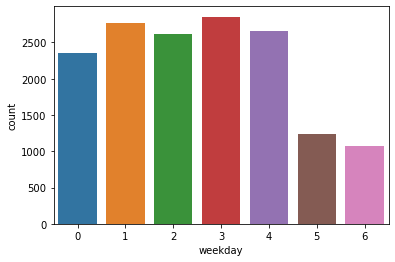

In [72]:
sns.countplot(x = 'weekday', data = data)

In [73]:
data.groupby('weekday')['price_m'].mean().sort_values (ascending = False)

weekday
0    100311.19
2     99076.14
1     98637.81
3     98603.34
4     98214.97
6     97859.28
5     97258.20
Name: price_m, dtype: float64

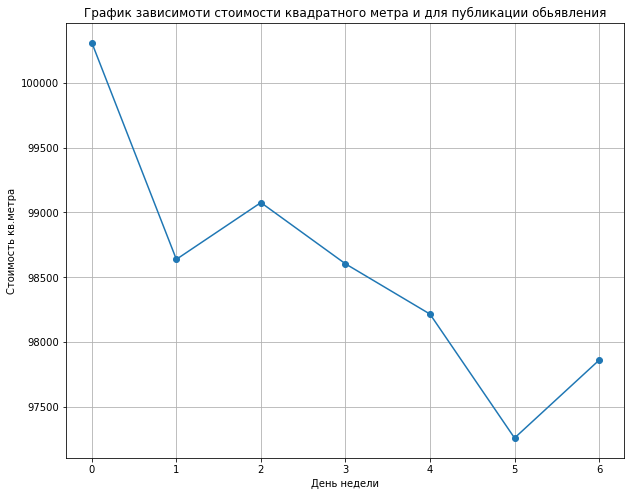

In [74]:
data.groupby('weekday')['price_m'].mean().plot(x='weekday',y='price_m',style='o-',
                                                                         grid=True,
                                                                         figsize=(10,8),ylabel = 'Стоимость кв.метра',
                                                   xlabel = 'День недели', 
                                                   title = 'График зависимоти стоимости квадратного метра и для публикации обьявления');


#### Вывод о количестве в зависимости от дня публикации
Больше всего публикаций в четверг (2854) и меньше всего в воскресенье (1066). Самые дорогие обьявления появлялиь в понедельник (100311) средняя стоимость аза квадратный метр, а самые недорогие в субботу (97258).

## Анализ квартир в центре Санкт-Петербурга 

In [75]:
data_center= data.query ('center_category == "central_area"' )
display (data_center)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday,month,year,square_k,square_l,price_m,category_floor,center_category
21,13,3200000,31.60,2018-03-14,1,2.70,5.0,16.9,2,0,...,<NA>,310,2,3,2018,0.18,0.53,101265.82,other,central_area
24,8,6500000,97.20,2015-10-31,2,2.70,3.0,46.5,1,0,...,124,265,5,10,2015,0.20,0.48,66872.43,first,central_area
35,6,15500000,149.00,2017-06-26,5,2.70,5.0,104.0,4,0,...,779,644,0,6,2017,0.11,0.70,104026.85,other,central_area
52,20,11795000,136.00,2017-09-22,6,3.00,2.0,94.0,2,0,...,<NA>,1,4,9,2017,0.08,0.69,86727.94,last,central_area
56,14,4350000,41.00,2016-03-28,1,2.80,7.0,18.1,4,0,...,439,152,0,3,2016,0.27,0.44,106097.56,other,central_area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23668,13,6000000,47.00,2018-03-16,2,3.00,5.0,27.0,4,0,...,<NA>,157,4,3,2018,0.19,0.57,127659.57,other,central_area
23674,10,5950000,56.00,2019-03-05,3,2.70,8.0,32.1,3,0,...,303,1,1,3,2019,0.15,0.57,106250.00,other,central_area
23690,3,5500000,52.00,2018-07-19,2,2.70,5.0,31.0,2,0,...,<NA>,15,3,7,2018,0.12,0.60,105769.23,other,central_area
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,0,...,806,519,3,10,2016,0.15,0.55,129903.98,other,central_area


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

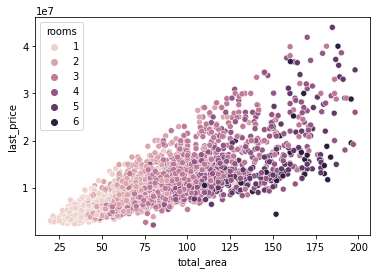

In [76]:
sns.scatterplot(x = 'total_area', y  = 'last_price', data= data_center, hue = 'rooms')

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

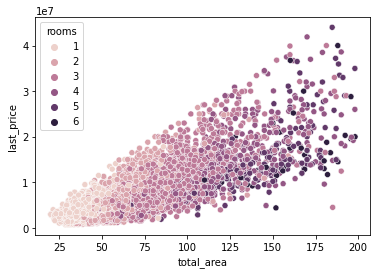

In [77]:
sns.scatterplot(x = 'total_area', y  = 'last_price', data= data, hue = 'rooms')

### Вывод: В центре распределение квартир по общей площади похоже на общее распределение квартир

In [78]:
#sns.countplot(x = 'rooms', data = data_center);

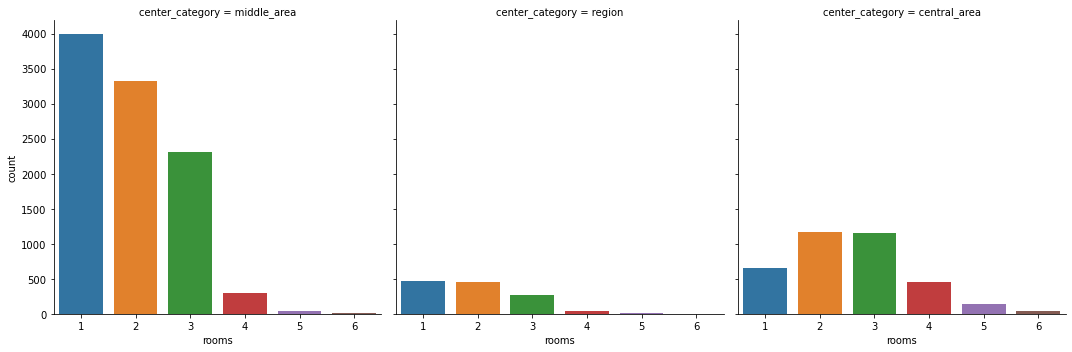

In [79]:
sns.catplot(x = 'rooms', col='center_category', data = data, kind="count");

In [80]:
sns.catplot?

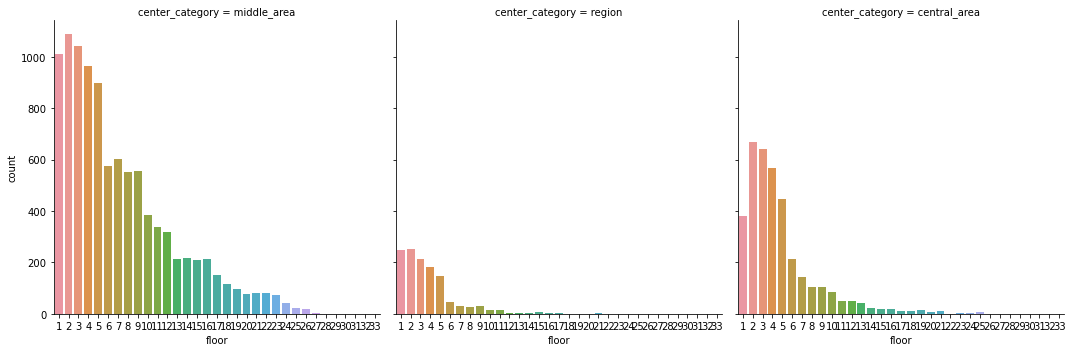

In [81]:
sns.catplot(x = 'floor', col='center_category', data = data, kind="count");

### Вывод: В центре по равлению другими регионамипредставленоменьше всего квартир, наибольшую часть занимают двухкомнатые итрехкомнатные квартиры. БОльший процент 5 и 6 комнатных по сравнению с другими регитонами

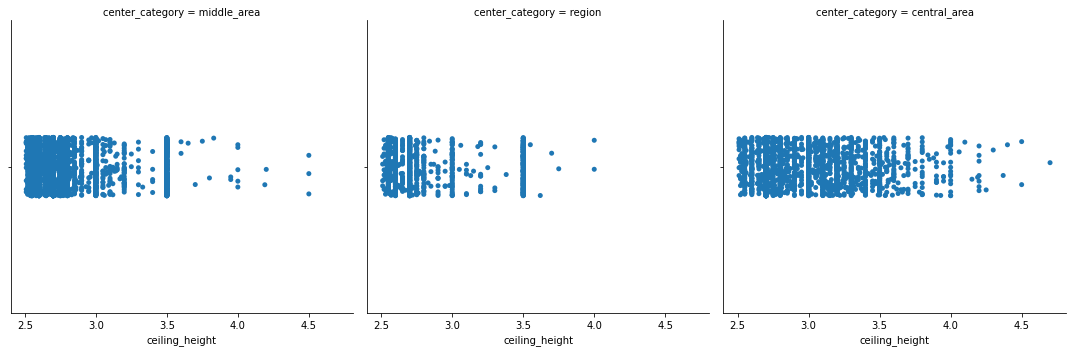

In [82]:
sns.catplot(x = 'ceiling_height', col='center_category', data = data);

### Вывод: В центре наибольшее количество обьектов  с потолками выше 3 метров

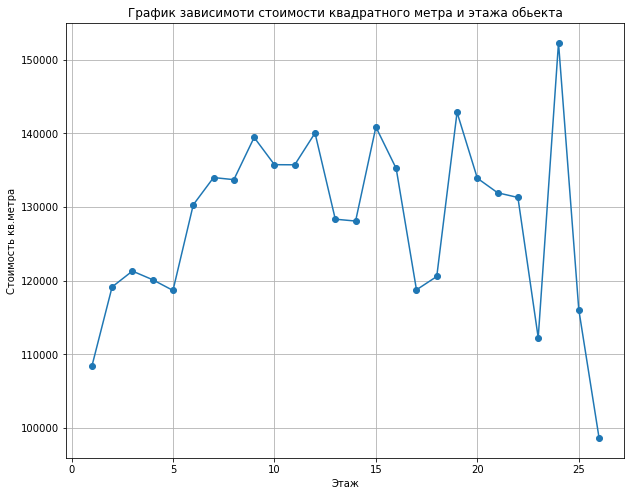

In [83]:
data_center.groupby('floor')['price_m'].mean().plot(x='floor',y='price_m',style='o-',
                                                                         grid=True,
                                                                         figsize=(10,8),ylabel = 'Стоимость кв.метра',
                                                   xlabel = 'Этаж', 
                                                   title = 'График зависимоти стоимости квадратного метра и этажа обьекта');


In [84]:
data_middle = data.query ('center_category == "middle_area"')

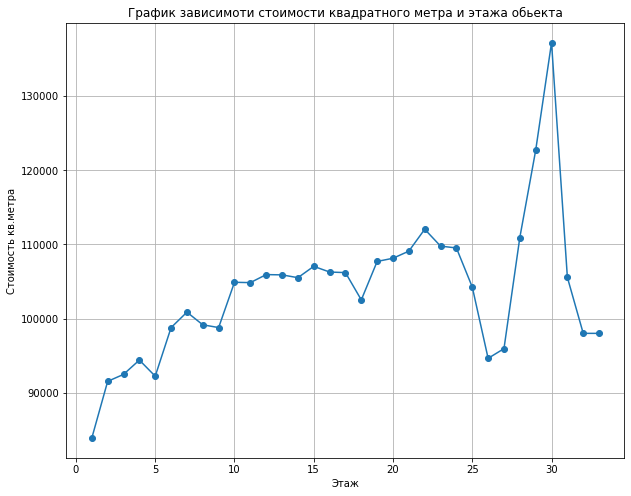

In [85]:
data_middle.groupby('floor')['price_m'].mean().plot(x='floor',y='price_m',style='o-',
                                                                         grid=True,
                                                                         figsize=(10,8),ylabel = 'Стоимость кв.метра',
                                                   xlabel = 'Этаж', 
                                                   title = 'График зависимоти стоимости квадратного метра и этажа обьекта');


In [86]:
data_region = data.query ('center_category == "region"')

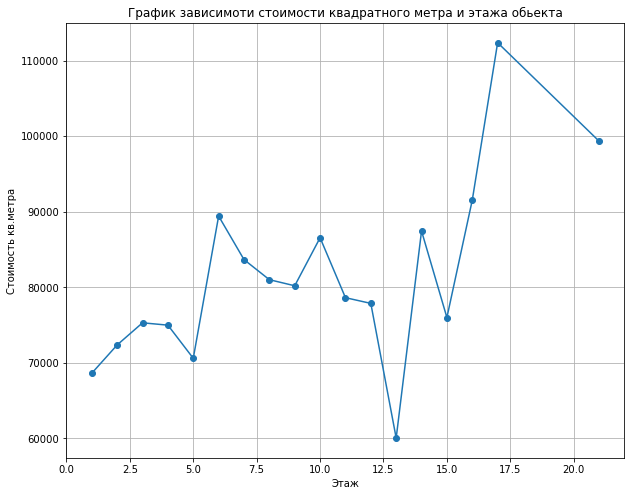

In [87]:
data_region.groupby('floor')['price_m'].mean().plot(x='floor',y='price_m',style='o-',
                                                                         grid=True,
                                                                         figsize=(10,8),ylabel = 'Стоимость кв.метра',
                                                   xlabel = 'Этаж', 
                                                   title = 'График зависимоти стоимости квадратного метра и этажа обьекта');


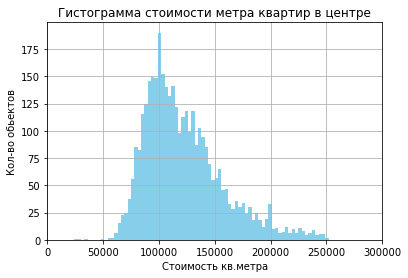

In [88]:
data_center['price_m'].hist(bins = 100, range = (0,300000), color = "skyblue", label="Sepal Length")
plt.xlim(0,300000)
plt.title ('Гистограмма стоимости метра квартир в центре')
plt.xlabel ('Стоимость кв.метра')
plt.ylabel ('Кол-во обьектов')
plt.show()

In [89]:
data_price_m = data.pivot_table(index = 'center_category',
                 values = 'price_m',  
                 aggfunc = ['count', 'median', 'max', 'min']).sort_values (('max','price_m'), ascending = False)
display (data_price_m)

,count,median,max,min
,price_m,price_m,price_m,price_m
center_category,,,,
central_area,3614,114868.60,249375.00,26250.00
middle_area,9955,95592.14,245098.04,24324.32
region,1238,73032.33,225000.00,22458.63


In [93]:
data_area_m = data.pivot_table(index = 'center_category',
                 values = 'total_area',  
                 aggfunc = ['count', 'median', 'max', 'min']).sort_values (('max','total_area'), ascending = False)
display (data_area_m)

,count,median,max,min
,total_area,total_area,total_area,total_area
center_category,,,,
middle_area,9955,50.0,198.1,22.23
central_area,3614,70.5,198.0,20.00
region,1238,48.0,188.1,22.00


In [91]:
data_center[data_center['price_m']< 27063]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday,month,year,square_k,square_l,price_m,category_floor,center_category
13739,19,2100000,80.0,2016-07-01,4,2.7,6.0,23.0,3,0,...,705,23,4,7,2016,0.17,0.29,26250.0,other,central_area


### Вывод: на графике видно, что стоимость квадратного метра увеличивается с увеличением этажа обьекта. Наибольшая стоимость метра у обьекта на 23 этаже. 

## Общий вывод

- В центре и по всем другим обьектам стоимость одинаково зависит от количества комнат (дороже всего стоят 3 и 5 комнатные).
- В центре наиболее популряны обьекты с потолками от 3 метров, тогда как в других районах большей популярностью пользуюстся обьекты с высотой потолков 2.5 метров
- В регионе  (удаление от центра более чем на 30 км) наблюдается в основном малоэтажная застройка (1-5 этаж). Высокая стоимоть кв. метра у обьектов от 16 до 22 этажа
- Наиболее дорогие обьекты в центре находятся на 5-25 этажах, тогда как в других районах на 22-31
- В центре наиоблее поплуряны двухкомнатыне квартиры, а в других районах 1-2 комнатные.
- В центре стоимость квартиры от 26250 до 26250 тыс за метр, в других районах от 22458 до 95592 тыс за метр. 
- Площадь квартир в центре в основном от 22 до 198 квадратов, в других районах от 20 до 198
- Больше всего обьявлений феврале 1675 и меньше всего в мае 892. Активнее всего продаются квартры в первые месяцы после Нового года (февраль-март) и перед Новым годом (декабрь)